In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


In [2]:
# Load California Housing Dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Standardize the features (important for SVM models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Fit SVM with a Linear Kernel
svm_linear = SVR(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)


SVR(kernel='linear')

In [6]:
# Fit SVM with an RBF Kernel
svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)


SVR()

In [7]:
# Fit SVM with a Polynomial Kernel
svm_poly = SVR(kernel='poly', degree=3)
svm_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

In [8]:
# Make predictions with Linear Kernel
y_pred_linear = svm_linear.predict(X_test_scaled)

# Evaluate the Linear Kernel model
print("Linear Kernel Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))


Linear Kernel Model:
Mean Squared Error: 0.5792716048598867
R-squared: 0.5579459432294915


In [9]:
# Make predictions with RBF Kernel
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate the RBF Kernel model
print("\nRBF Kernel Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rbf))
print("R-squared:", r2_score(y_test, y_pred_rbf))



RBF Kernel Model:
Mean Squared Error: 0.35700403193386515
R-squared: 0.7275628923016773


In [10]:
# Make predictions with Polynomial Kernel
y_pred_poly = svm_poly.predict(X_test_scaled)

# Evaluate the Polynomial Kernel model
print("\nPolynomial Kernel Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("R-squared:", r2_score(y_test, y_pred_poly))



Polynomial Kernel Model:
Mean Squared Error: 1.003098226283534
R-squared: 0.23451514531738127


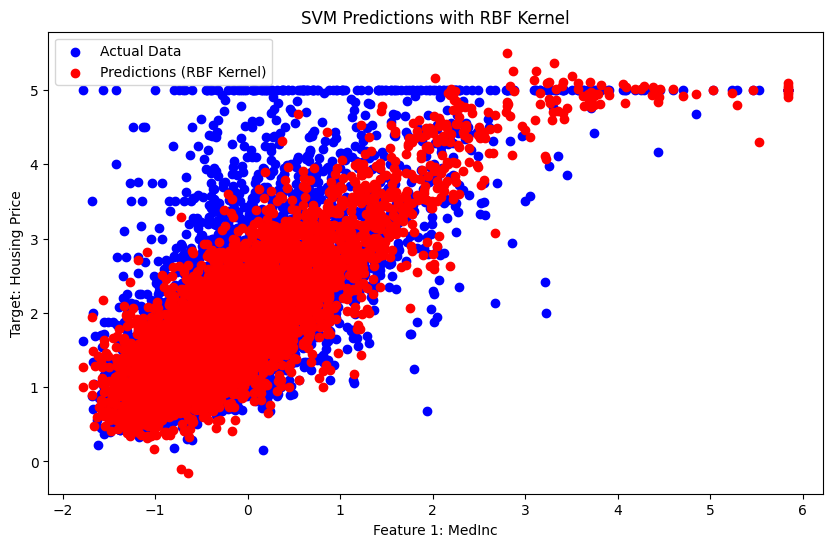

In [11]:
# Optional: Visualize the results (for simplicity, visualize only for RBF kernel on the first two features)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual Data')
plt.scatter(X_test_scaled[:, 0], y_pred_rbf, color='red', label='Predictions (RBF Kernel)')
plt.xlabel('Feature 1: ' + X.columns[0])  # 'MedInc' - Median Income
plt.ylabel('Target: Housing Price')
plt.title('SVM Predictions with RBF Kernel')
plt.legend()
plt.show()
